In [1]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Dropout
import tensorflow as tf
import splitfolders 
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import itertools
import plotly.graph_objects as go
import plotly.express as px
#Suppressing Warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
print(model.summary())

553476096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

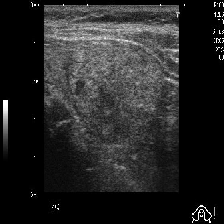

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

img_path = '/content/gdrive/MyDrive/validation/validation/Malign/21_1.jpg'
#There is an interpolation method to match the source size with the target size
#image loaded in PIL (Python Imaging Library)
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
display(img)

In [ ]:
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

In [ ]:
x = preprocess_input(x)
features = model.predict(x)
p = decode_predictions(features)

49152/35363 [=========================================] - 0s 0us/step


In [ ]:
import os
import cv2
from PIL import Image
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_dir = '/content/drive/MyDrive/Image Classification/dataset/Skin cancer dataset'
train_dir = '/content/gdrive/MyDrive/train/train'
train_benign_dir = '/content/gdrive/MyDrive/train/train/Benign'
train_malign_dir = '/content/gdrive/MyDrive/train/train/Malign'
test_dir = '/content/gdrive/MyDrive/validation/validation'
test_benign_dir = '/content/gdrive/MyDrive/validation/validation/Benign'
test_malign_dir = '/content/gdrive/MyDrive/validation/validation/Malign'

valid_dir = '/content/gdrive/MyDrive/validation/validation'
valid_benign_dir = '/content/gdrive/MyDrive/validation/validation/Benign'
valid_malign_dir = '/content/gdrive/MyDrive/validation/validation/Malign'


In [ ]:
num_benign_train = len(os.listdir(train_benign_dir))
num_malignant_train = len(os.listdir(train_malign_dir))
num_benign_validaition = len(os.listdir(valid_benign_dir))
num_malignant_validation= len(os.listdir(valid_malign_dir))
num_benign_test = len(os.listdir(test_benign_dir))
num_malignant_test= len(os.listdir(test_malign_dir))

In [ ]:
print("Total Training Benign Images",num_benign_train)
print("Total Training Malignant Images",num_malignant_train)
print("--")
print("Total validation Benign Images",num_benign_validaition)
print("Total validation Malignant Images",num_malignant_validation)
print("--")
print("Total Test Benign Images", num_benign_test)
print("Total Test Malignant Images",num_malignant_test)
total_train = num_benign_train+num_malignant_train
total_validation = num_benign_validaition+num_malignant_validation
total_test = num_benign_test+num_malignant_test
print("Total Training Images",total_train)
print("--")
print("Total Validation Images",total_validation)
print("--")
print("Total Testing Images",total_test)

Total Training Benign Images 55
Total Training Malignant Images 218
--
Total validation Benign Images 34
Total validation Malignant Images 105
--
Total Test Benign Images 34
Total Test Malignant Images 105
Total Training Images 273
--
Total Validation Images 139
--
Total Testing Images 139


In [ ]:
IMG_SHAPE  = 224
batch_size = 32

In [ ]:
image_gen_train = ImageDataGenerator(rescale = 1./255)
train_data_gen = image_gen_train.flow_from_directory(batch_size = batch_size,
directory = train_dir,
shuffle= False,
target_size = (IMG_SHAPE,IMG_SHAPE),
class_mode = 'binary')
image_generator_validation = ImageDataGenerator(rescale=1./255)
val_data_gen = image_generator_validation.flow_from_directory(batch_size=batch_size,
directory=valid_dir,
target_size=(IMG_SHAPE, IMG_SHAPE),
class_mode='binary')
image_gen_test = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_test.flow_from_directory(batch_size=batch_size,
directory=test_dir,
target_size=(IMG_SHAPE, IMG_SHAPE),
class_mode='binary')

Found 273 images belonging to 2 classes.
Found 139 images belonging to 2 classes.
Found 139 images belonging to 2 classes.


In [ ]:
pre_trained_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  print(layer.name)
  layer.trainable = False

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [ ]:
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(2, activation='sigmoid')(x)

In [ ]:
model = tf.keras.Model(pre_trained_model.input, x)

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['acc'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg_classifier = model.fit(train_data_gen,
steps_per_epoch=(total_train//batch_size),
epochs = 5,
validation_data=val_data_gen,
validation_steps=(total_validation//batch_size),
batch_size = batch_size,
verbose = 1)

Epoch 1/5
8/8 [==============================] - 232s 28s/step - loss: 2.5101 - acc: 0.7054 - val_loss: 1.4869 - val_acc: 0.7500
Epoch 2/5
8/8 [==============================] - 190s 25s/step - loss: 0.9617 - acc: 0.6763 - val_loss: 0.6114 - val_acc: 0.7422
Epoch 3/5
8/8 [==============================] - 207s 27s/step - loss: 1.3803 - acc: 0.7635 - val_loss: 1.3084 - val_acc: 0.7500
Epoch 4/5
8/8 [==============================] - 187s 24s/step - loss: 0.6273 - acc: 0.7718 - val_loss: 0.6144 - val_acc: 0.7734
Epoch 5/5
8/8 [==============================] - 205s 27s/step - loss: 0.9418 - acc: 0.3983 - val_loss: 0.5677 - val_acc: 0.7500


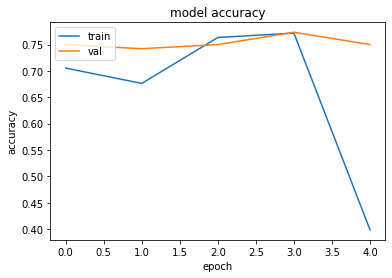

In [ ]:
plt.plot(vgg_classifier.history['acc'])
plt.plot(vgg_classifier.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import joblib

In [ ]:
joblib.dump(vgg_classifier,'vggmodel.pkl')

['vggmodel.pkl']

In [ ]:
es = EarlyStopping(monitor='acc', mode='min', verbose=1, patience=50,baseline=0.7)

In [ ]:
mc = ModelCheckpoint('bestvgg_model.h5', monitor='acc', mode='max', save_best_only=True)

In [ ]:
vgg_classifier = model.fit(train_data_gen,
steps_per_epoch=(total_train//batch_size),
epochs = 5,
validation_data=val_data_gen,
validation_steps=(total_validation//batch_size),
batch_size = batch_size,
verbose = 1,
callbacks=[es,mc]
)

Epoch 1/5
8/8 [==============================] - 194s 25s/step - loss: 0.4599 - acc: 0.7801 - val_loss: 0.6975 - val_acc: 0.7656
Epoch 2/5
8/8 [==============================] - 186s 24s/step - loss: 0.7531 - acc: 0.7718 - val_loss: 0.7441 - val_acc: 0.7578
Epoch 3/5
8/8 [==============================] - 184s 24s/step - loss: 0.6988 - acc: 0.7137 - val_loss: 0.6663 - val_acc: 0.5469
Epoch 4/5
8/8 [==============================] - 185s 25s/step - loss: 0.6318 - acc: 0.7261 - val_loss: 0.5924 - val_acc: 0.7500
Epoch 5/5
8/8 [==============================] - 184s 24s/step - loss: 0.5752 - acc: 0.7552 - val_loss: 0.5669 - val_acc: 0.7422


In [ ]:
joblib.dump(vgg_classifier,'vggmodel2.pkl')

['vggmodel2.pkl']

In [ ]:
classifier = joblib.load()

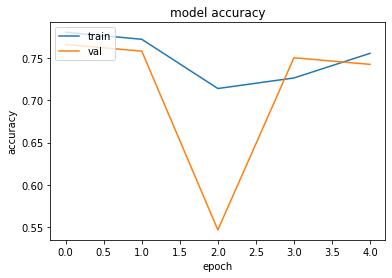

In [ ]:
plt.plot(vgg_classifier.history['acc'])
plt.plot(vgg_classifier.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

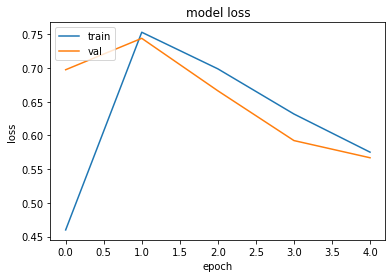

In [ ]:
plt.plot(vgg_classifier.history['loss'])
plt.plot(vgg_classifier.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
!pip3 install keras
!pip3 install ann_visualizer
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=dadcaa85ea799271407c0f6706239bd100af0a8b79d43cca7fc3f2681840ff24
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 4.1 MB/s 


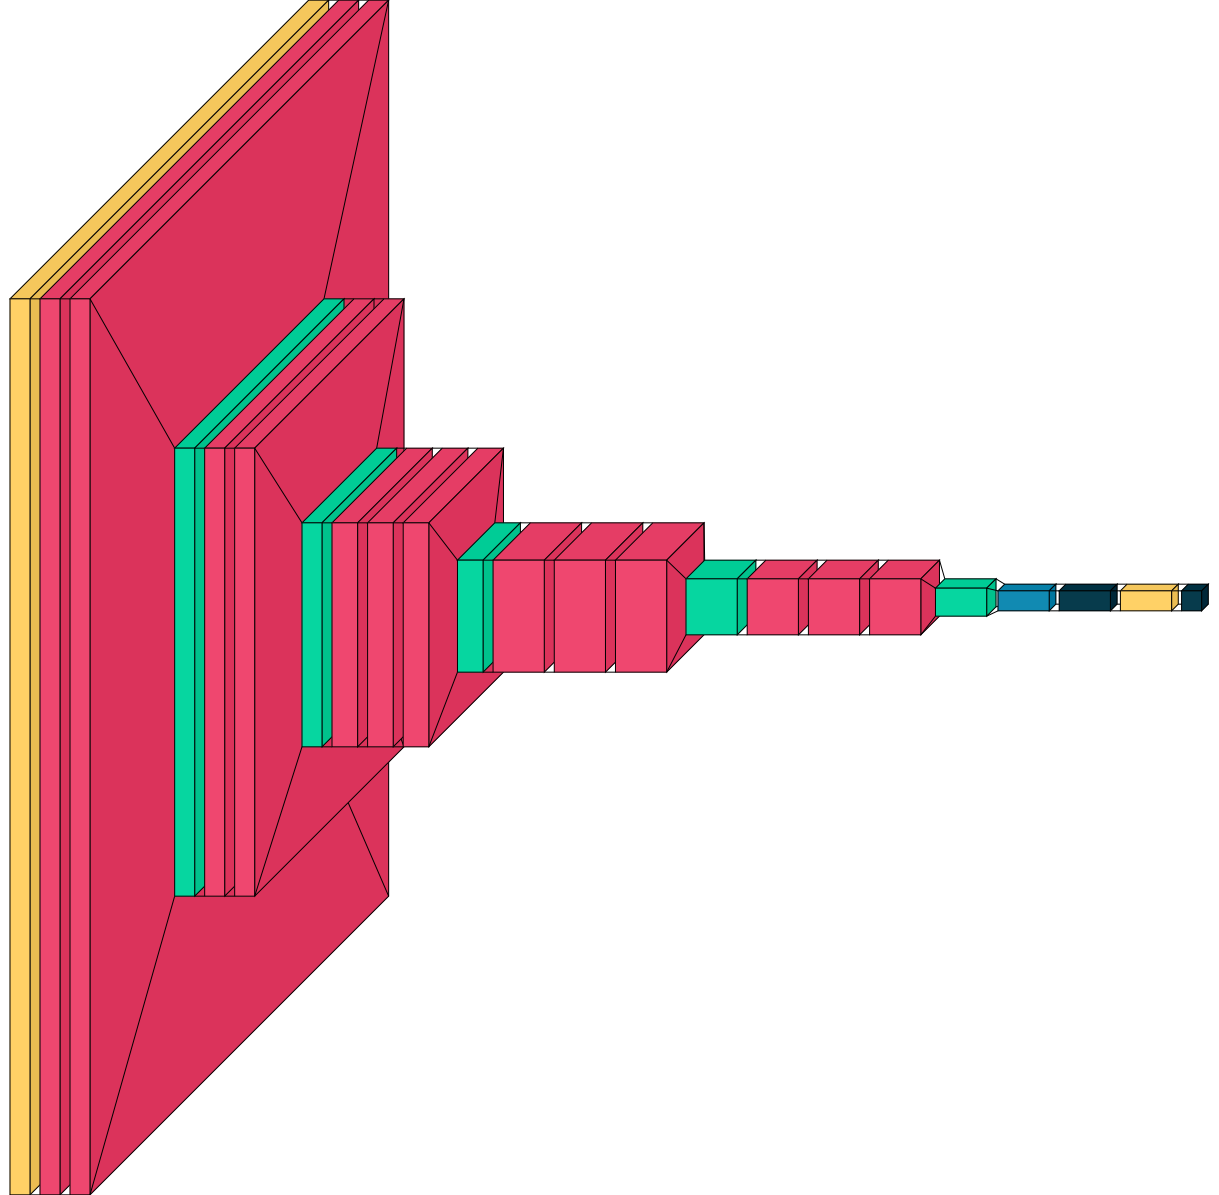

In [ ]:
import visualkeras
visualkeras.layered_view(model)

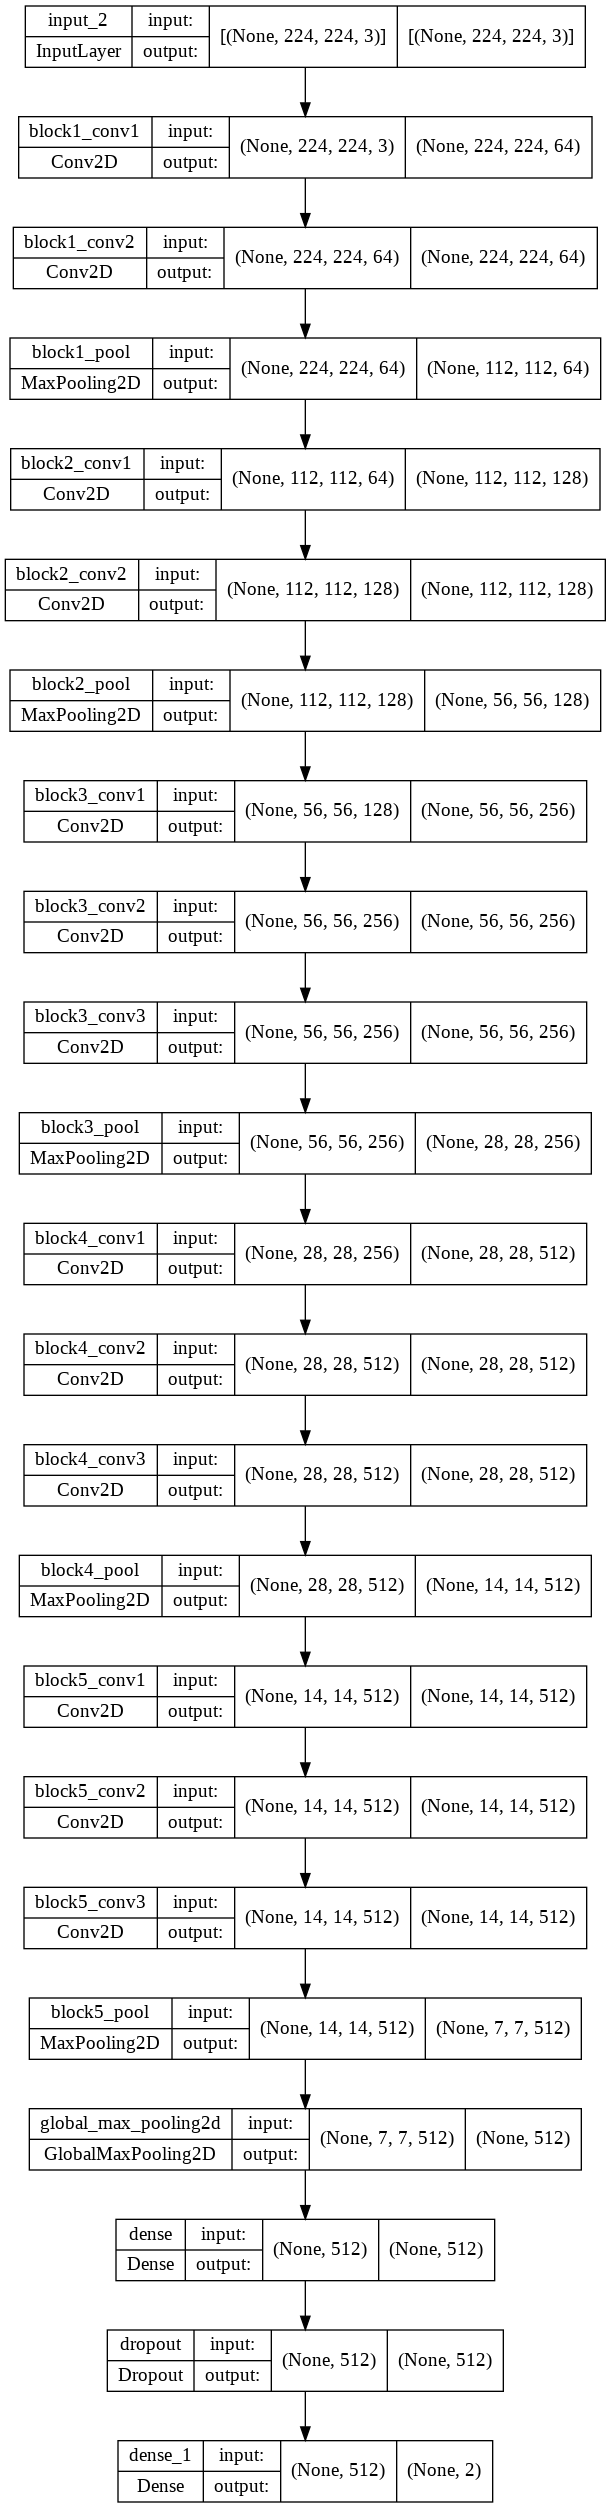

In [ ]:
tf.keras.utils.plot_model(model, to_file="vggmodel.png", show_shapes=True)

In [ ]:
layer_names = []
for layer in classifier.layers[:]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
​
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

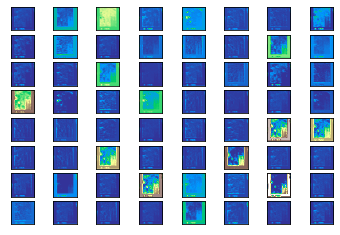

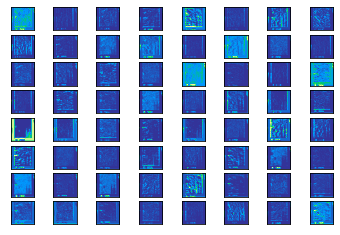

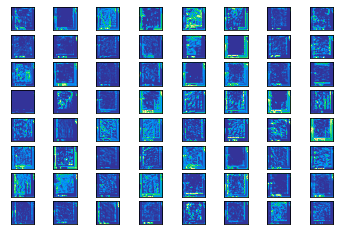

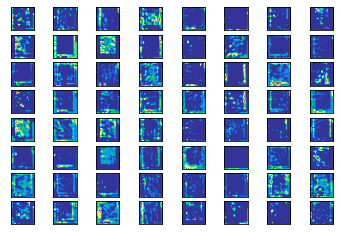

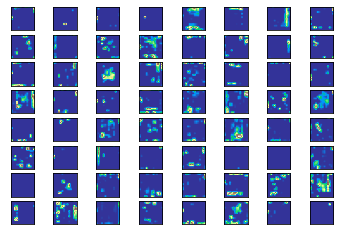

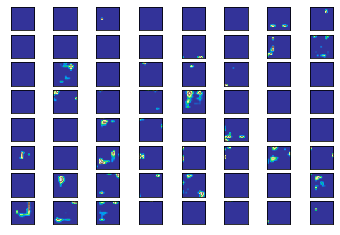

In [10]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

model = VGG16()
ixs=[2,5,8,11,14,17]
outputs=[model.layers[i].output for i in ixs]
model=Model(inputs=model.inputs,outputs=outputs)
img=load_img('347_1.jpg',target_size=(224,224))
img=img_to_array(img)
img=expand_dims(img,axis=0)
img=preprocess_input(img)
feature_maps=model.predict(img)

square=8

for fmap in feature_maps:
  ix=1
  for _ in range(square):
    for _ in range(square):
      ax=pyplot.subplot(square,square,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(fmap[0,: ,:, ix-1],cmap='terrain')
      ix+=1
  pyplot.show()